### Hypothesis 2: Technical skills (like PYTHON, SQL) are more demanded in companies with a higher employee count.

In [2]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Import Required Libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [4]:
# database connection details
db_type = 'postgresql'  
username = 'postgres'
password = 'abc123'
host = 'localhost'
port = '5432'  
database = 'DataEngineering'

# Create the connection string
connection_string = f'{db_type}://{username}:{password}@{host}:{port}/{database}'


In [5]:
# Conn String
connection_string = f'{db_type}://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)

query = """
SELECT 
    c."Company",
    c."Employee_Count",
    s."Skill",
    COUNT(jp."Job_Posting_id") as Skill_Demand
FROM 
    public."Companies" c
JOIN 
    public."Job_Postings" jp ON c."Company_id" = jp."Company_id"
JOIN 
    public."Job_Postings_Skills" jps ON jp."Job_Posting_id" = jps."Job_Posting_id"
JOIN 
    public."Skills" s ON jps."Skill_id" = s."Skill_id"
GROUP BY 
    c."Company", c."Employee_Count", s."Skill"
"""

df = pd.read_sql_query(query, engine)

# Convert the skill names to uppercase for consistent filtering
df['Skill'] = df['Skill'].str.upper()

# Filter the data for Python and SQL skills
df_python = df[df['Skill'] == 'PYTHON']
df_sql = df[df['Skill'] == 'SQL']

In [6]:
print(df_python)
print(df_sql)

                       Company  Employee_Count   Skill  skill_demand
20   Tata Consultancy Services           10001  PYTHON             3
33         ACURA SOLUTIONS LTD             110  PYTHON             6
39    IDESLABS PRIVATE LIMITED            1200  PYTHON             4
69                 LTIMindtree           10001  PYTHON             7
77                       Wipro           10001  PYTHON             3
102                     Uplers            5000  PYTHON            52
108                    Genpact           10001  PYTHON             1
                     Company  Employee_Count Skill  skill_demand
7                LTIMindtree           10001   SQL            71
16                     Wipro           10001   SQL             4
25                    Uplers            5000   SQL            60
53  IDESLABS PRIVATE LIMITED            1200   SQL            41
92       ACURA SOLUTIONS LTD             110   SQL            16


### Data Visualization

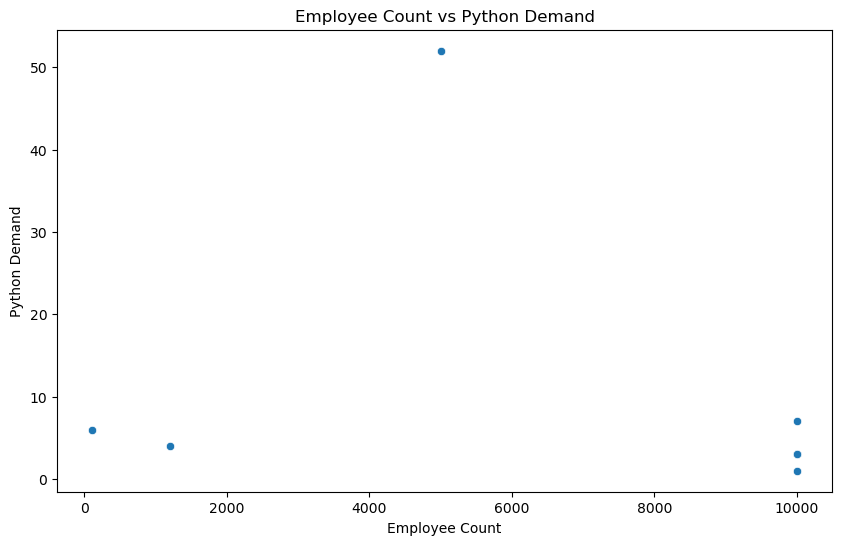

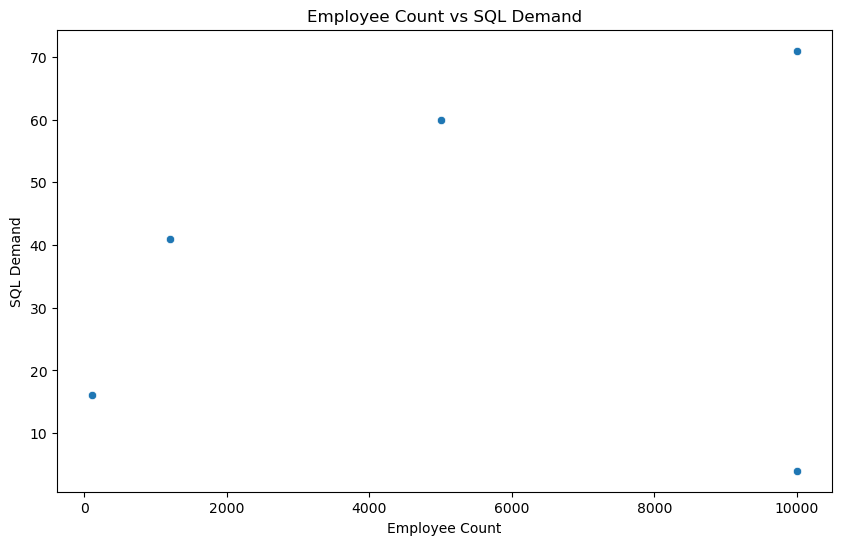

In [7]:
# Visualization for Python Demand
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employee_Count', y='skill_demand', data=df_python)
plt.title('Employee Count vs Python Demand')
plt.xlabel('Employee Count')
plt.ylabel('Python Demand')
plt.show()

# Visualization for SQL Demand
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employee_Count', y='skill_demand', data=df_sql)
plt.title('Employee Count vs SQL Demand')
plt.xlabel('Employee Count')
plt.ylabel('SQL Demand')
plt.show()


### Apply Machine Learning Models

In [17]:
# Split the data
X_python = df_python[['Employee_Count']].values
y_python = df_python['skill_demand'].values
X_sql = df_sql[['Employee_Count']].values
y_sql = df_sql['skill_demand'].values

X_train_python, X_test_python, y_train_python, y_test_python = train_test_split(X_python, y_python, test_size=0.2, random_state=42)
X_train_sql, X_test_sql, y_train_sql, y_test_sql = train_test_split(X_sql, y_sql, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_python_scaled = scaler.fit_transform(X_train_python)
X_test_python_scaled = scaler.transform(X_test_python)
X_train_sql_scaled = scaler.fit_transform(X_train_sql)
X_test_sql_scaled = scaler.transform(X_test_sql)


### k-Nearest Neighbors (k-NN)


In [18]:
knn_python = KNeighborsRegressor(n_neighbors=3)
knn_python.fit(X_train_python_scaled, y_train_python)
y_pred_knn_python = knn_python.predict(X_test_python_scaled)

# k-NN for SQL Demand
knn_sql = KNeighborsRegressor(n_neighbors=3)
knn_sql.fit(X_train_sql_scaled, y_train_sql)
y_pred_knn_sql = knn_sql.predict(X_test_sql_scaled)

# Evaluate k-NN
mse_knn_python = mean_squared_error(y_test_python, y_pred_knn_python)
r2_knn_python = r2_score(y_test_python, y_pred_knn_python)
print(f'k-NN Python Demand Mean Squared Error: {mse_knn_python:.2f}')
print(f'k-NN Python Demand R^2 Score: {r2_knn_python:.2f}')

mse_knn_sql = mean_squared_error(y_test_sql, y_pred_knn_sql)
r2_knn_sql = r2_score(y_test_sql, y_pred_knn_sql)
print(f'k-NN SQL Demand Mean Squared Error: {mse_knn_sql:.2f}')
print(f'k-NN SQL Demand R^2 Score: {r2_knn_sql:.2f}')

k-NN Python Demand Mean Squared Error: 93.61
k-NN Python Demand R^2 Score: -40.60
k-NN SQL Demand Mean Squared Error: 2844.44
k-NN SQL Demand R^2 Score: nan


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### Random Forest

In [19]:
# Random Forest for Python Demand
rf_python = RandomForestRegressor(n_estimators=100, random_state=42)
rf_python.fit(X_train_python, y_train_python)
y_pred_rf_python = rf_python.predict(X_test_python)

# Random Forest for SQL Demand
rf_sql = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sql.fit(X_train_sql, y_train_sql)
y_pred_rf_sql = rf_sql.predict(X_test_sql)

# Evaluate Random Forest
mse_rf_python = mean_squared_error(y_test_python, y_pred_rf_python)
r2_rf_python = r2_score(y_test_python, y_pred_rf_python)
print(f'Random Forest Python Demand Mean Squared Error: {mse_rf_python:.2f}')
print(f'Random Forest Python Demand R^2 Score: {r2_rf_python:.2f}')

mse_rf_sql = mean_squared_error(y_test_sql, y_pred_rf_sql)
r2_rf_sql = r2_score(y_test_sql, y_pred_rf_sql)
print(f'Random Forest SQL Demand Mean Squared Error: {mse_rf_sql:.2f}')
print(f'Random Forest SQL Demand R^2 Score: {r2_rf_sql:.2f}')
 

Random Forest Python Demand Mean Squared Error: 55.72
Random Forest Python Demand R^2 Score: -23.76
Random Forest SQL Demand Mean Squared Error: 3910.00
Random Forest SQL Demand R^2 Score: nan


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### XGBoost

In [20]:
# XGBoost for Python Demand
xgb_python = XGBRegressor(n_estimators=100, random_state=42)
xgb_python.fit(X_train_python, y_train_python)
y_pred_xgb_python = xgb_python.predict(X_test_python)

# XGBoost for SQL Demand
xgb_sql = XGBRegressor(n_estimators=100, random_state=42)
xgb_sql.fit(X_train_sql, y_train_sql)
y_pred_xgb_sql = xgb_sql.predict(X_test_sql)

# Evaluate XGBoost
mse_xgb_python = mean_squared_error(y_test_python, y_pred_xgb_python)
r2_xgb_python = r2_score(y_test_python, y_pred_xgb_python)
print(f'XGBoost Python Demand Mean Squared Error: {mse_xgb_python:.2f}')
print(f'XGBoost Python Demand R^2 Score: {r2_xgb_python:.2f}')

mse_xgb_sql = mean_squared_error(y_test_sql, y_pred_xgb_sql)
r2_xgb_sql = r2_score(y_test_sql, y_pred_xgb_sql)
print(f'XGBoost SQL Demand Mean Squared Error: {mse_xgb_sql:.2f}')
print(f'XGBoost SQL Demand R^2 Score: {r2_xgb_sql:.2f}')


XGBoost Python Demand Mean Squared Error: 2.22
XGBoost Python Demand R^2 Score: 0.01
XGBoost SQL Demand Mean Squared Error: 4488.85
XGBoost SQL Demand R^2 Score: nan


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### Interpretation
#### Mean Squared Error (MSE): Lower values indicate better performance.
#### R-squared (R²): Values closer to 1 indicate a better fit.

### According to above results, Hypothesis 2 is wrong!